<a href="https://colab.research.google.com/github/jdy5294/All_Deep_Learning/blob/main/Code/CH11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11장 데이터 다루기

## 3. 판다스를 활용한 데이터 조사

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

df.head(5)

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 11.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [5]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


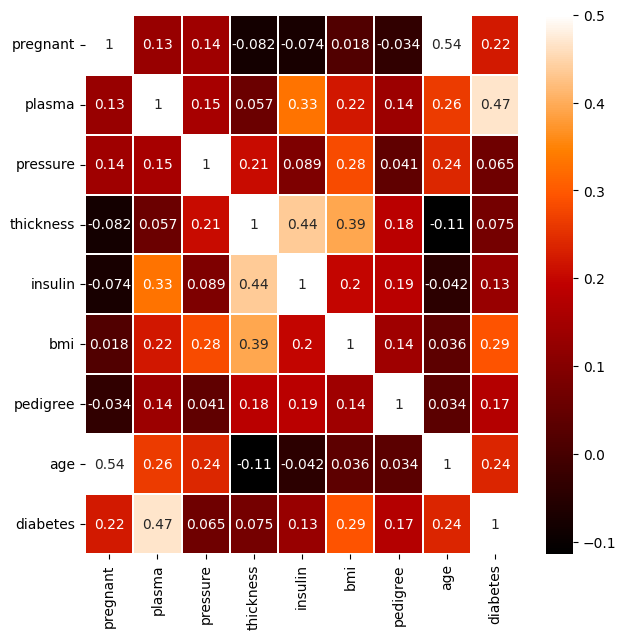

In [8]:
colormap = plt.cm.gist_heat   # 그래프의 색상 구성
plt.figure(figsize=(7,7))

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True) # vmax: 0.5에 가까울수록 밝은색으로 표시
plt.show()

## 4. 중요한 데이터 추출하기

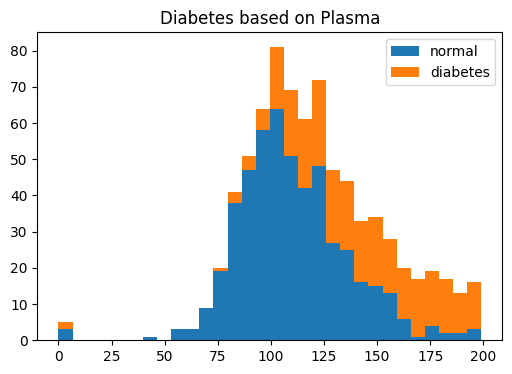

In [12]:
plt.figure(figsize=(6,4))
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.title("Diabetes based on Plasma")
plt.legend()
plt.show()

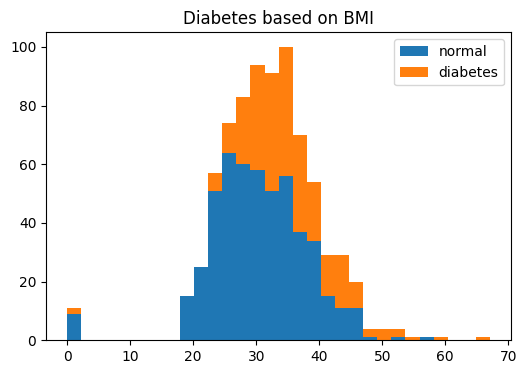

In [13]:
plt.figure(figsize=(6,4))
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.title("Diabetes based on BMI")
plt.legend()
plt.show()

## 5. 피마 인디언 당뇨병 예측 실행

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:,0:8]
y = df.iloc[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Output Shape: 딥러닝에서 행의 수는 batch_size에 정한 만큼 입력되므로 특별히 세지 않고 None으로 표시

In [ ]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 2ms/step - loss: 1.7955 - accuracy: 0.5430
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7971 - accuracy: 0.6432
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6419
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6406
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6523
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6549
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6536
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6589
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6589
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6226 - accura